# Question 17

Part a

We assume the charges to be at coordinates{ $(2.5\sqrt{2},2.5\sqrt{2})$ and $(-2.5\sqrt{2},-2.5\sqrt{2})$} centimeter respectively, to avoid infinite electric field or potential.

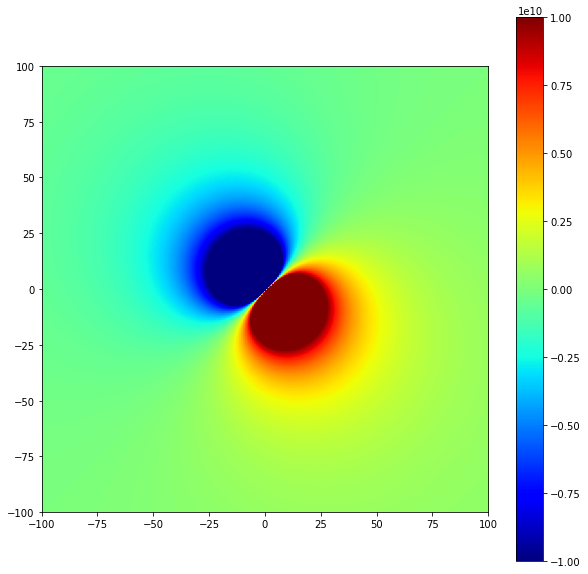

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

V=np.zeros((200,200))
x1=2.5*math.sqrt(2)
y1=2.5*math.sqrt(2)
x2=-2.5*math.sqrt(2)
y2=-2.5*math.sqrt(2)
q=1
k=8.99e9
for i in range(200):
    for j in range(200):
        r1=math.sqrt((j-x1-100)**2+(i-y1-100)**2)
        r2=math.sqrt((j-x2-100)**2+(i-y2-100)**2)
        V[j][i]=k*(1/r1-1/r2)*1e2
#print(vol[-100])
plt.figure(figsize=(10,10))        
plt.imshow(V, extent=[-100,100,-100,100], vmax=1e10, vmin=-1e10)
plt.jet()
plt.colorbar()
#print(vol[4,4]-vol[2,2])

Part-b:
For derivative calculation, we take nearest neighbour forward.


In [2]:
E_x=np.zeros((200,200))
E_y=np.zeros((200,200))

for i in range(199):
    for j in range(200):
        E_x[j][i]=V[j][i+1]-V[j][i]
        E_x[j][199]=E_x[j][198]

for i in range(200):
    for j in range(199):
        E_y[j][i]=V[j+1][i]-V[j][i]
        E_y[199][i]=E_y[198][i]

E=np.zeros((200,200))
direc=np.zeros((200,200))

for i in range(200):
    for j in range(200):
        E[j][i]=math.sqrt(E_x[j][i]**2+E_y[j][i]**2)*1e2
        if(E_y[j][i]==0):
            direc[j][i]=0
        if(E_x[j][i]==0):
            direc[j][i]=math.pi/2
        elif(E_x[j][i]>0):
            direc[j][i]=math.atan(E_y[j][i]/E_x[j][i])
        elif(E_x[j][i]<0):
            direc[j][i]=math.atan(E_y[j][i]/E_x[j][i])+(math.pi)*(np.sign(E_y[j][i]))
            

            






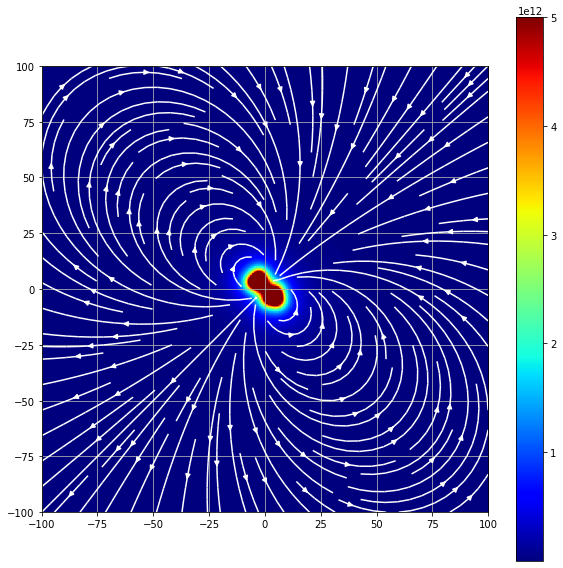

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(E, extent=[-100,100,-100,100], vmax=5e12)
plt.jet()
plt.colorbar()

X,Y=np.meshgrid(np.linspace(-100,100,200), np.linspace(-100,100,200))            
plt.streamplot(X,Y,E_x, E_y, density=1.2, linewidth=None, color='w')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()

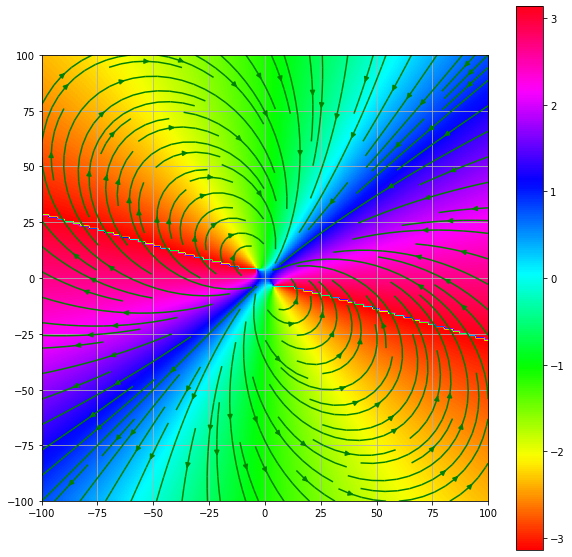

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(direc, extent=[-100,100,-100,100])
plt.hsv()
plt.colorbar()
X,Y=np.meshgrid(np.linspace(-100,100,200), np.linspace(-100,100,200))            
plt.streamplot(X,Y,E_x,E_y, density=1.2, linewidth=None, color='g')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()


In [ ]:
def sigma(q_0,x,y,x_0,y_0,L):
    return (q_0*(math.sin(2*math.pi*x)/L)*(math.sin(2*math.pi*y)/L))/math.sqrt((x-x_0)**2+(y-y_0)**2)

from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def int_f(low, high, N, y, x_0, y_0):
    x,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(sigma(q_0,x[i],y,x_0,y_0,L))
    return val

def V(low, high, N, x_0, y_0):
    y,w_1=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w_1[i])*(int_f(low, high, N, y[i], x_0, y_0))
    return val

q_0=100
L=0.1
P=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        P[j][i]=V(-L,L, 50, j-50, i-50)
        
plt.figure(figsize=(10,10))
plt.imshow(P, vmin=-0.00001, vmax=0.00001)
plt.jet()
plt.colorbar()
    
    
#warning: It takes around 20 minutes to run in google colab

In [ ]:
E_x_P=np.zeros((100,100))
E_y_P=np.zeros((100,100))

for i in range(99):
    for j in range(100):
        E_x_P[j][i]=P[j][i+1]-P[j][i]
        E_x_P[j][99]=E_x_P[j][98]

for i in range(100):
    for j in range(99):
        E_y_P[j][i]=P[j+1][i]-P[j][i]
        E_y_P[99][i]=E_y_P[98][i]

E_P=np.zeros((100,100))
direc_P=np.zeros((100,100))

for i in range(100):
    for j in range(100):
        E_P[j][i]=math.sqrt(E_x_P[j][i]**2+E_y_P[j][i]**2)*1e2
        if(E_y_P[j][i]==0):
            direc_P[j][i]=0
        if(E_x_P[j][i]==0):
            direc_P[j][i]=math.pi/2
        elif(E_x_P[j][i]>0):
            direc_P[j][i]=math.atan(E_y_P[j][i]/E_x_P[j][i])
        elif(E_x_P[j][i]<0):
            direc_P[j][i]=math.atan(E_y_P[j][i]/E_x_P[j][i])+(math.pi)*(np.sign(E_y_P[j][i]))
            
plt.figure(figsize=(10,10))
plt.imshow(E_P, extent=[-50,50,-50,50], vmax=2)
plt.jet()
plt.colorbar()

X,Y=np.meshgrid(np.linspace(-50,50,100), np.linspace(-50,50,100))            
plt.streamplot(X,Y,E_x_P, E_y_P, density=1.2, linewidth=None, color='w')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(direc, extent=[-50,50,-50,50])
plt.hsv()
plt.colorbar()
X,Y=np.meshgrid(np.linspace(-50,50,100), np.linspace(-50,50,100))            
plt.streamplot(X,Y,E_x_P,E_y_P, density=1.2, linewidth=None, color='g')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()